# IFT6269 - Homework 2 - Linear Classification

**Due**: Tuesday, October 13, 2020

#### Name: Sima Jeddi
#### Student ID: 260937719
#### Collaborators: 



### Introduction

In this assignment you will compare the performance of several algorithm on some synthetic classification tasks. The assignment consists of two parts: 1) a derivation of the estimators for the Fisher LDA with general covariance matrix derivation and 2) the implementation of several classification algorithms.

### Tasks
0.   Get your own copy of this file via "File > Save a copy in Drive...",
1.   Fill your personal information and collaborators at the top of this assignment, and rename the notebook accordingly, e.g., `hw2_thomasBayes.ipynb`
2.   Read the instructions provided on each section and cell carefully,
3.   Answer the section **Math Questions on Fisher LDA**,
4.   Implement the requested algorithms in section **Playground** following the example provided in dummy_model`,
5.   In section **Model Comparison**, for each of the datasets:
    *   use the training data to estimate the parameters of each of the 4 algorithms,
    *   plot the corresponding estimated decision boundary and the training set using the function `plot_results`, 
    *   compute the training and test accuracy and fill the table in each section by hand,
    *   compare the performance of each of the algorithms and provide an explanation for your observations based on, for example, their accuracy, overfitting/generalization properties, whether the assumptions of each algorithms are satisfied by the data, etc. 
    
**Important**: You are allowed to collaborate with other students in both the math and coding parts of this assignment. However, the answers provided here must reflect your individual work. For that reason, you are not allowed to share this notebook, except for your submission to the TA for grading. **Don't forget to pin and save the version of the notebook you want to be graded on!**

In [ ]:
!wget http://www.iro.umontreal.ca/~slacoste/teaching/ift6269/A20/notes/hwk2data.zip
!unzip hwk2data.zip

import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

--2020-10-26 04:07:06--  http://www.iro.umontreal.ca/~slacoste/teaching/ift6269/A20/notes/hwk2data.zip
Resolving www.iro.umontreal.ca (www.iro.umontreal.ca)... 132.204.26.36
Connecting to www.iro.umontreal.ca (www.iro.umontreal.ca)|132.204.26.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70575 (69K) [application/zip]
Saving to: ‘hwk2data.zip’

hwk2data.zip        100%[===================>]  68.92K  --.-KB/s    in 0.06s   

2020-10-26 04:07:06 (1.13 MB/s) - ‘hwk2data.zip’ saved [70575/70575]

Archive:  hwk2data.zip
  inflating: hwk2data/classificationA.test  
  inflating: hwk2data/classificationA.train  
  inflating: hwk2data/classificationB.test  
  inflating: hwk2data/classificationB.train  
  inflating: hwk2data/classificationC.test  
  inflating: hwk2data/classificationC.train  


You get 3 different datasets (**A**, **B**, **C**) with a training and test set for each, i.e., 6 sets in total. Each row represents a sample of data $(x_i, y_i)$. There are three columns: the first two give the coordinates for $x_i \in \mathbb{R}^2$; the third column gives the class label $y_i \in \{0, 1\}$. The datasets are all generated from some kind of mixture of Gaussians generative model. The train and test sets are generated from the same distribution for each types of dataset. 

To help your interpretation, we give you the actual
generating process. However, keep in mind that normally we would not know the information about the generating process. In this
assignment, we will compare different classification approaches.
*  **Dataset A**: the class-conditionals for this dataset are Gaussians with different means, but with a shared covariance matrix $\Sigma$.
*  **Dataset B**: similar generating process but the covariance matrices are different for the two classes.
*  **Dataset C**: here one class is a mixture of two Gaussians, while the other class is a single Gaussian (with no sharing).

Test the different models learnt from the corresponding training data on these test data. Compute for each model the accuracy (i.e.  the fraction of the data correctly classified) on the training set and compute it as well for the test set. And compare the performances of the different methods on the three datasets.


In [ ]:
data = {}

for d_ix in ["A", "B", "C"]:
    for t_flag in ["train", "test"]:
        data[t_flag + "_" + d_ix] = np.loadtxt("/content/hwk2data/classification"+d_ix+"."+t_flag)

### Models

**Fisher LDA**
>  We first consider the Fisher LDA model as seen in class: given the class variable, the data are assumed to be Gaussians with different means for different classes but with the same covariance matrix: $Y \sim \text{Bernoulli}(\pi)$, $X | \{Y = j\} \sim \mathcal{N}(\mu_j, \Sigma)$.

**Logistic Regression**
>  Implement logistic regression for an affine function $f(x) = w^Tx+b$ (do not forget the constant term – you can use the bias feature trick) using the IRLS algorithm (Newton’s method) which was described in class. Hint: never compute the matrix inverse by itself – this is not numerically stable when the Hessian might become ill-conditioned.

**Linear regression**

> As mentioned in class, we can forget that the class $y$ can only take the two values $0$ or $1$ and think of it as a real-valued variable on which we can do standard linear regression (least-squares). Here, the Gaussian noise model on $y$ does not make any sense from a generative point of view; but we can still do least-squares to estimate the parameters of a linear decision boundary (you’ll be surprised by its performance despite coming from a “bad”
generative model!). Implement linear regression (for an affine function $f(x) = w^Tx + b$) by solving the normal equations on each dataset (with no regularization).


**QDA**
>  We finally relax the assumption that the covariance matrices for the two classes are the same. So, given the class label, the data are now assumed to be Gaussian with means and covariance matrices which are a priori different:
$Y \sim \text{Bernoulli}(\pi)$, $X | \{Y = j\} \sim \mathcal{N}(\mu_j, \Sigma_j)$.

## Math Questions on Fisher LDA

This week's math questions will be typed directly in this notebook, i.e., no scanned hand-written answers accepted! You can use standard $\LaTeX$ sintax here!



**Question A:** Derive the form of the maximum likelihood estimator for the Fisher LDA model described above. Hint: you can re-use some of the tricks presented in class for the MLE of a multivariate Gaussian, but adapted to this setting. You can get inspiration from Section 7.2 in Mike’s book (which covers the case where $\Sigma$ is diagonal).

**Answer:**


$\mathcal{l}(\mathcal{x} | \pi, \mu_i, \Sigma) = \sum_{i=1}^n [\log p(x_i | y = y_i,\mu_{y_i}, \Sigma ) + \log p(y_i | \pi)]$


$\nabla_\pi \mathcal{l}(\mathcal{x} | \pi, \mu_i, \Sigma_i) = \sum_{i=1}^n\nabla_\pi \log p(y_i | \pi)$ 

$= \sum_{i=1}^n\nabla_\pi\log[\pi^{y_i}(1-\pi)^{1-y_i}] = \sum_{i=1}^n \frac{y_i}{\pi}+ \frac{(1-y_i)}{(1-\pi)} = \frac{n_1}{\pi}+ \frac{n_0}{(1-\pi)} = 0$

So we have: $\hat\pi  = n_1/(n_0+n_1)$

**MLE Means**:

$\nabla_{\mu_c} \mathcal{l}(\mathcal{x} | \theta, \mu_i, \Sigma) = \nabla_{\mu_c} \sum_{i=1}^n  \log p(x_i | y = y_i,\mu_{y_i}, \Sigma )$

 $\mu_0$ part: $-\frac{1}{2}\sum_{i:y_i=0}(x_i-\mu_0)^T \Sigma^{-1} (x_i-\mu_0)=0 $

Taking derivative w.r.t $\mu_0$:
$\frac{1}{2}\sum_{i:y_i=0}2\Sigma^{-1}(x_i-\mu_0) = 0$

So we have: $\hat\mu_0 = \frac{1}{n_0}\sum_{i:y_i=0}x_i$

Same for $\mu_1$: $\hat\mu_1 = \frac{1}{n_1}\sum_{i:y_i=1}x_i$


**MLE Covariance**

$\nabla_{\Sigma} \mathcal{l}(\mathcal{x} | \theta, \mu_i, \Sigma_i) = \sum_{i=1}^n \nabla_{\Sigma}[\log |\Sigma|^{-1/2} + \left[-\frac{1}{2}(x_i-\mu_{y_i})^T\Sigma^{-1}(x_i-\mu_{y_i})\right] )]$


Using the same trace trick that we saw in the class and taking the derivative w.r.t. $\Sigma^{-1}$: 


$ \frac{n_0+n_1}{2}(\Sigma^{-1})^-1 - \frac{n_0}{2}\bar\Sigma(\mu_0,n_0)-\frac{n_1}{2}\bar\Sigma(\mu_1,n_1) = 0$

$\hat\Sigma = \frac{n_0\bar\Sigma(\hat\mu_0,n_0)+n_1\bar\Sigma(\mu_1,n_1)}{n_0+n_1} = \frac{1}{n}\sum_{c=0,1}\sum_{i\in C}(x_i-\hat\mu_c)(x_i-\hat\mu_c)^T$


**Question B:** What is the form of the conditional distribution $p(y = 1|x)$? Compare with the form of logistic regression

**Answer:** The resulted form is same as the functional form of multi-class logistic regression. So our assumption on  Σ have lead to a linear decision boundry.

From Lecture 8 we have: 
$p(y=1|x) = \frac{1}{1+e^{-f(x)}}$ 

whrere $f(x) = \log\frac{P(Y=1,X=x)}{Y=0,X=x}=\log\frac{P(X=x|Y=1)}{P(X=x|Y=0)}+\log\frac{P(Y=1)}{P(Y=0)}$

$= \log \frac{\mathcal{N}(\mu_1,sigma)}{\mathcal{N}(\mu_0,sigma)}+\log\frac{\pi}{1-\pi} = \log\frac{\exp(-\frac{1}{2}(x-\mu_1)^T \Sigma^{-1}(x-\mu_1))}{\exp(-\frac{1}{2}(x-\mu_0)^T \Sigma^{-1}(x-\mu_0))} +\log\frac{\pi}{1-\pi}$

$ = \frac{1}{2}(\mu_0^T\Sigma^{-1}\mu_0-\mu_1^T\Sigma^{-1}\mu_1) + \mu_1^T\Sigma^{-1}x-\mu_0^T\Sigma^{-1}x \log\frac{\pi}{1-\pi}$

If we consider $\beta_c = \mu_c^T\Sigma^{-1}, \alpha = \log(p_c) -\frac{1}{2}\mu_c^T\Sigma^{-1}\mu_c, p_1 =\pi, p_0 = 1-\pi$

$f(x) = w^T\phi(x),$

$ w= (\beta_1-\beta_0, \alpha_1-\alpha_0)^T, \phi(x)=(x,1)^T $

Thus f(x) is linear in x.

## Playground

You are allowed to add as many cells and functions as you wish in this section, but not allowed to change the signature (name and inputs) of the functions! 

In [ ]:
def dummy_model(X, y):
    
    """
    This is a dummy model to show you how your solution is expected to look like
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            dummy_classifier: dummy classification function
    """
    
    # Just computing some means and standard deviations, nothing fancy
    mu0, mu1 = X[:, 0].mean(), X[:, 1].mean()
    s0, s1 = X[:, 0].std(), X[:, 1].std()
    
    
    def dummy_classifier(x0, x1):
        # Note how we use the variables mu0, mu1, s0 and s1 computed from the data
        # to define this function. Their values get stored in the definition
        # of the function itself, meaning that we don't have to store them explicitly.
        return 0.5 * (1 + np.tanh((x0 - mu0)**2/s0 - (x1 - mu1)**2/s1))
    
    return dummy_classifier

In [ ]:
def LDA(X, y):
    """
    Estimates the parameters of an LDA model
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            LDA_classifier: function taking two scalar inputs implementing the
                            estimated p(y=1|x)
    """
    # TODO: parameter estimation goes here
    #intercept = np.ones((X.shape[0], 1))


    #intercept = np.ones((X.shape[0], 1))  
    #X = np.concatenate((intercept, X), axis=1)

    nclasses = len(np.unique(y))
    nfeatures = np.size(X, axis=1)
    nsamples = np.size(X, axis=0)

    class_indexes = []
    mu_hat = np.empty((nclasses, nfeatures))

    theta_hat = y.mean(axis=0)
    

    for i in range(nclasses):
        class_indexes.append(np.argwhere(y == i))
        mu_hat[i] = np.mean(X[class_indexes[i]], axis=0)

    xi_mui0 = np.subtract(X[class_indexes[0]].reshape(-1, nfeatures), 
                                 mu_hat[0])
    Sigma_part_one = xi_mui0.T.dot(xi_mui0)

    
    xi_mui1 = np.subtract(X[class_indexes[1]].reshape(-1, nfeatures), 
                                 mu_hat[1])
    Sigma_part_two = xi_mui1.T.dot(xi_mui1)

    Sigma = (Sigma_part_one + Sigma_part_two)/np.size(X, axis=0)

    W = np.dot(np.linalg.pinv(Sigma), 
                  np.subtract(mu_hat[1], 
                              mu_hat[0]))
    #print(W)

    W0 = -0.5 * np.dot(W.T, (mu_hat[0] + mu_hat[1])) + np.log10(theta_hat/(1-theta_hat))

    #print(W0)
    
    def LDA_classifier(x0, x1):
         # TODO: use the variables estimated above to define p(y=1|(x0, x1))
         
        return  W[1]*x1+W[0]*x0 + W0
        
    
    return LDA_classifier

In [ ]:
def sigmoid(z):
      arr = np.zeros(len(z))
      for i in range(len(z)):
        if z[i]>0:
          arr[i] = np.exp(z[i]) / (1 + np.exp(z[i]))
        else:
          arr[i] = 1 / (1 + np.exp(-z[i]))
      return arr

sigmoid([1,2,3])

array([0.73105858, 0.88079708, 0.95257413])

In [ ]:
def LogReg(X, y):
    """
    Estimates the parameters of a Logistic Regression model
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            LogReg_classifier: function taking two scalar inputs implementing the
                               estimated p(y=1|x)
    """
    # TODO: parameter estimation goes here
    from numpy import linalg as LA
    from scipy.special import expit
    # Initialize log_likelihood & parameters                                                                   


    
                                                                 
    # Convergence Conditions                                                        



        # @ is syntactic sugar for np.dot(H_inv, g.T)¹
                                                              
                                                                                    
        # Perform our update step                                                    
                                                                  
        # Update the log-likelihood at each iteration 

    #def sigmoid(z):
    #  arr = np.zeros(len(z))
    #  for i in range(len(z)):
    #    if z[i]>0:
    #      arr[i] = np.exp(z[i]) / (1 + np.exp(z[i]))
    #    else:
    #      arr[i] = 1 / (1 + np.exp(-z[i]))
    # return arr

    def sigmoid(z):
      return 1 / (1 + np.exp(-z))

    intercept = np.ones((X.shape[0], 1))
    
    X = np.concatenate((intercept, X), axis=1)


    w = np.array([-.4, 0.0001, 0.0003]).transpose().reshape(-1,1)

    δ = .000000001 
    max_iterations = 15
    Δw = np.Infinity 
    iter = 0

    while abs(Δw) > δ and iter<max_iterations:
      iter += 1
      z = np.dot(X, w)

      A = sigmoid(z) * (1 - sigmoid(z)).T
      B = np.dot(X.transpose(), A)

      hessian = np.dot(B, X)
      hessian.shape

      a = y.reshape(-1,1)-sigmoid(z)
      gradient = [np.dot(X[:,0], a), np.dot(X[:,1], a), np.dot(X[:,2], a)];

      step = np.linalg.lstsq(hessian, gradient)[0]
      step = np.squeeze(np.asarray(step))
      step = step.T.reshape(-1,1)

      w = w - step
      Δw = LA.norm(step)
      #print(w)
      #print(iter)

    #print(w)
    #print(iter)
    
    def LogReg_classifier(x0, x1):
         # TODO: use the variables estimated above to define p(y=1|(x0, x1))
        return sigmoid( w[0]+w[1]*x0+w[2]*x1)
    
    return LogReg_classifier


In [ ]:
def LinReg(X, y):
    """
    Estimates the parameters of a Linear Regression model
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            LinReg_classifier: function taking two scalar inputs implementing the
                               estimated f(x)
    """
    # TODO: parameter estimation goes here
    intercept = np.ones((X.shape[0], 1))
    
    X = np.concatenate((intercept, X), axis=1)

    A = X.transpose() @ X
    B = X.transpose() @ y

    w = np.linalg.lstsq(A, B)[0]

    def LinReg_classifier(x0, x1):
         # TODO: use the variables estimated above to implement f(x0, x1)
        f = w[0]+w[1]*x0+w[2]*x1
        
        return f>0.5 
    
    return LinReg_classifier


In [ ]:
#X_train, y_train = data["train_A"][:, 0:2], data["train_A"][:, -1]
#X_test, y_test = data["test_A"][:, 0:2], data["test_A"][:, -1]
#X = X_train
#y = y_train


In [ ]:
def QDA(X, y):
    """
    Estimates the parameters of a QDA model
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            QDA_classifier: function taking two scalar inputs implementing the
                            estimated p(y=1|x)
    """
    # TODO: parameter estimation goes here
    covmats = []
    class_indexes = []

    nclasses = len(np.unique(y))
    nfeatures = np.size(X, axis=1)
    nsamples = np.size(X, axis=0)

    mu_hat = np.empty((nclasses, nfeatures))

    for i in range(nclasses):
      class_indexes.append(np.argwhere(y == i))
      mu_hat[i] = np.mean(X[class_indexes[i]], axis=0)

    covmats.append(np.cov(np.transpose(X[np.where(y == 0)[0],])))
    covmats.append(np.cov(np.transpose(X[np.where(y == 1)[0],])))

    theta_hat = y.mean(axis=0)
    

    
    def QDA_classifier(x0, x1):      
         # TODO: use the variables estimated above to implement p(y=1|(x0, x1))
        
      A = np.dot(np.linalg.pinv(covmats[0]), 
                  np.subtract([x0,x1], 
                              mu_hat[0,:]))
      part0 = np.dot(np.subtract([x0,x1], 
                              mu_hat[0,:]), A)
           
      B = np.dot(np.linalg.pinv(covmats[1]), np.subtract([x0,x1], 
                              mu_hat[1,:]))
      part1 = np.dot(np.subtract([x0,x1], 
                              mu_hat[1,:]), B)

      f = -0.5* (part1 - part0) + np.log10(theta_hat/(1-theta_hat))
         
      return 1/(1+np.exp(-f))
        
    return QDA_classifier
    

## Model Comparison

You are allowed to change the cell contents unless explicitly noted otherwise. Use the provided cells to type your answers and fill the tables.

### Code for plotting results

In [ ]:
# ----------------------------------------------------------------------- #
#                      Do NOT modify this cell
# ----------------------------------------------------------------------- #

def pointwise_eval(f, umatrix, vmatrix):
    """
    Evaluates the function f over a grid given by the matrices u and V
        
        Inputs:
            f: [callable] function (of two scalar inputs) to be evaluated
            u: [n x m] matrix of values for the first input
            v: [n x m] matrix of values for the second input
                    
        Returns:
            z: [n x m] matrix of function values f(u_ij, v_ij) for i \in [1..n], j \in [1..m]
    """
    n, m = umatrix.shape
    z = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
          z[i, j] = f(umatrix[i, j], vmatrix[i,j])
    return z
    
def plot_results(X, y, classifiers):
    """
    Displays the behavior of the several classifiers via a 2x2 subplot.
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
            classifiers: [4] list of functions in EXACTLT the following order:
                         ["LDA", "LogReg", "LinReg", "QDA"]
                         
        Output:
            2x2 subplot with showing a scatter plot of the data, a contour plot 
            for each classifier function and the level set f(x)=0.5 in black. 
        
    """
    
    assert len(classifiers) == 4
    
    labels = ["LDA", "LogReg", "LinReg", "QDA"]
    
    # Find range in each dimension and setup a meshgrid
    x0_list = np.linspace(X[:, 0].min(), X[:, 0].max(), 250)
    x1_list = np.linspace(X[:, 1].min(), X[:, 1].max(), 250)
    x0_v, x1_v = np.meshgrid(x0_list, x1_list, sparse=False, indexing='ij')
    
    # Create 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(9, 9))
    (ax1, ax2), (ax3, ax4) = axs
    
    for ix, ax in enumerate([ax1, ax2, ax3, ax4]):
        
        # Take an individual classifier
        f = classifiers[ix]
        
        if not f is None:
            
            # Evaluate over the meshgrid and plot contour lines
            # Z = f(x0_v, x1_v) # This is old code!!
            Z = pointwise_eval(f, x0_v, x1_v)
            contours = ax.contourf(x0_v, x1_v, Z, 5, cmap='RdBu', alpha=0.2);
            ax.clabel(contours, inline=True, fontsize=10)
            ax.contour(x0_v, x1_v, Z, [0.5], colors='black');

            # Plot the labelled data on top
            ax.scatter(X[y==0, 0], X[y==0, 1], marker="x", c='r');
            ax.scatter(X[y==1, 0], X[y==1, 1], marker="o", facecolors='none', edgecolors='b');
            ax.set_title(labels[ix])

### Dataset A

#### Parameter estimation and plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


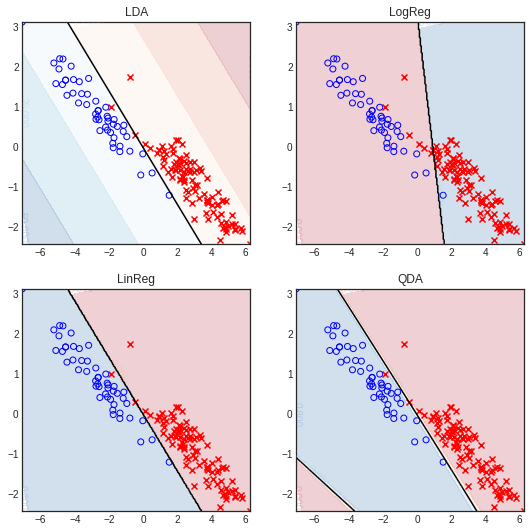

In [ ]:
X_train, y_train = data["train_A"][:, 0:2], data["train_A"][:, -1]
X_test, y_test = data["test_A"][:, 0:2], data["test_A"][:, -1]


# Note that by setting some of the entries to None you can implement and test each
# of the methods one by one.

# You can erase the following TWO lines once you are comfortable with the codebase.
#dummy_class_list = [LDA(X_train, y_train), LogReg(X_train, y_train), LinReg(X_train, y_train), QDA(X_train, y_train)]
#plot_results(X_train, y_train, dummy_class_list)

# Your classifiers list should always look like this. Run this when you
# have implemented and tested the methods above.

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)

In [ ]:
output = []

f = QDA(X_train, y_train)

for i in range(X_test.shape[0]):
  output.append(f(X_test[i,0], X_test[i,1]))

QDA_preds = np.array(output)>0.5
QDA_preds.astype(int)
np.sum(QDA_preds == y_test)/X_test.shape[0]*100

97.86666666666667

In [ ]:
output = []

f = LinReg(X_train, y_train)

for i in range(X_test.shape[0]):
  output.append(f(X_test[i,0], X_test[i,1]))

LinReg_preds = np.array(output).astype(int)

np.sum(LinReg_preds == y_test)/X_test.shape[0]*100#QDA_preds.astype(int)
#np.sum(QDA_preds == y_test)/X_test.shape[0]*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


97.93333333333332

#### Comparison


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 98.7 % | 97.5 %
*LogReg* | 95.3 % | 93.5 %
*LinReg* | 99.33 % | 97.93 %
*QDA* | 98.7 % | 97.87 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:** Misclassification error or 1-accuracy is larger on test data as it is expected. That is because we have not seen the test data before while the model was trained using the train data.


**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:** 
QDA and LDA have very similar results because both of them can classify the data that is generated using guassians with different means and the same covariance matrix. 

### Dataset B

#### Parameter estimation and plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


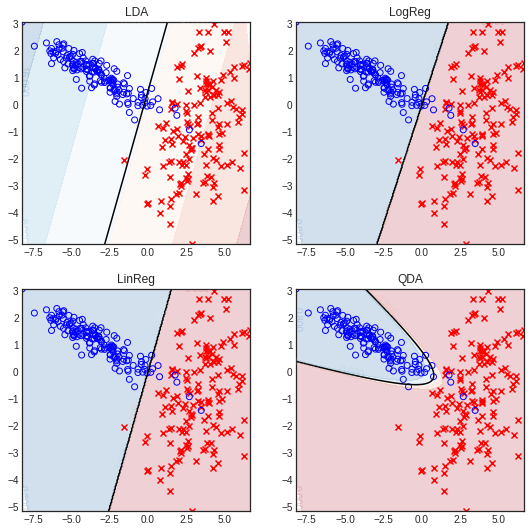

In [ ]:
X_train, y_train = data["train_B"][:, 0:2], data["train_B"][:, -1]
X_test, y_test = data["test_B"][:, 0:2], data["test_B"][:, -1]


# Your classifiers list should always look like this. Run this when you
# have implemented and tested the methods above.

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)

#### Comparison


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 99.26 % | 94.9 %
*LogReg* | 91.33 % | 95.2 %
*LinReg* | 99.40 % | 95.85 %
*QDA* | 97.65 % | 96.2 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:** The misclassiffication error is larger on the test set because we do not have prior information about it.



**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:** It is obvious from the test results that QDA method performs better as it is expected by the data nature. Because the data is combination of guassians with different means and covariance matrices. 

### Dataset C

#### Parameter estimation and plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


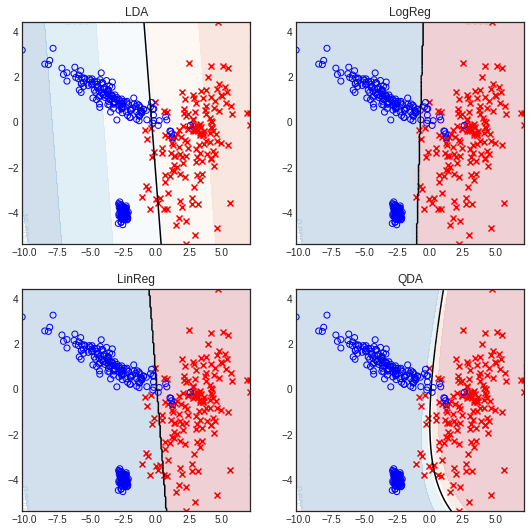

In [ ]:
X_train, y_train = data["train_C"][:, 0:2], data["train_C"][:, -1]
X_test, y_test = data["test_C"][:, 0:2], data["test_C"][:, -1]


# Your classifiers list should always look like this. Run this when you
# have implemented and tested the methods above.

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)

#### Comparison


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 98.47 % | 95.1 %
*LogReg* | 98.93 % | 94.3 %
*LinReg* | 95.77 % | 95.77 %
*QDA* | 96.2 % | 96.2 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:** For LinReg and QDA misclassification error is the same on the train and test sets.



**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:** QDA shoul perform better on this data because this data is a mixture of guassians on one class and a single guassian on another one.  